In [207]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import lhcutils.io as liu
from matplotlib.patches import Rectangle
import beamlinegraphics as blg


read tracks

In [182]:
df = pd.read_csv('fort.35',delim_whitespace=True)
df.columns = ['pid','par','S','x','px','y','py','sigma','xxx']

read aperture

In [120]:
ap = pd.read_csv('../../apertures.dat',delim_whitespace=True)

read collimator positions and settings

In [216]:
def get_collgaps(collgfn,twissfn):
    # get collgaps
    cg = pd.read_csv(collgfn,delim_whitespace=True)
    cg.columns=['ID','name','angle','betx','bety','halfgap','material','len','sigx','sigy','tilt1','tilt2','nsig','nan']
    cg = cg[['name','angle','halfgap','len']]
    
    # get optics
    r = liu.TFSReader(twissfn)
    s    = np.array(r.get_parameter('s')).astype('float')
    name = np.array(r.get_parameter('name'))
    twiss= pd.concat([pd.DataFrame(name),pd.DataFrame(s)],axis=1)
    twiss.columns=['name','s']
    
    return pd.merge(twiss,cg,how='right', on=['name'])

def plot_colli_gaps(axis,collimDF):
    for i in range(len(collimators.s)):
        try:
            if collimators.angle[i]!=0:
                col = 'gray'
            else:
                col = 'black'
            axis.add_patch(Rectangle((collimDF.s[i] - 0.5*collimDF.len[i], -40), collimDF.len[i], 
                                    40-1000*collimDF.halfgap[i], facecolor=col, edgecolor=col))
            axis.add_patch(Rectangle((collimDF.s[i] - 0.5*collimDF.len[i], 40), collimDF.len[i], 
                                    -40+1000*collimDF.halfgap[i], facecolor=col, edgecolor=col))
        except:
            pass

In [210]:
collgfn = '../../preprocessing/coupling_setup/input/collgaps.dat'
twissfn = '../../preprocessing/coupling_setup/input/twiss_b1.tfs'

In [211]:
# read collimator gaps and positions
collimators = get_collgaps(collgfn,twissfn)

plot the data

In [224]:
% matplotlib inline

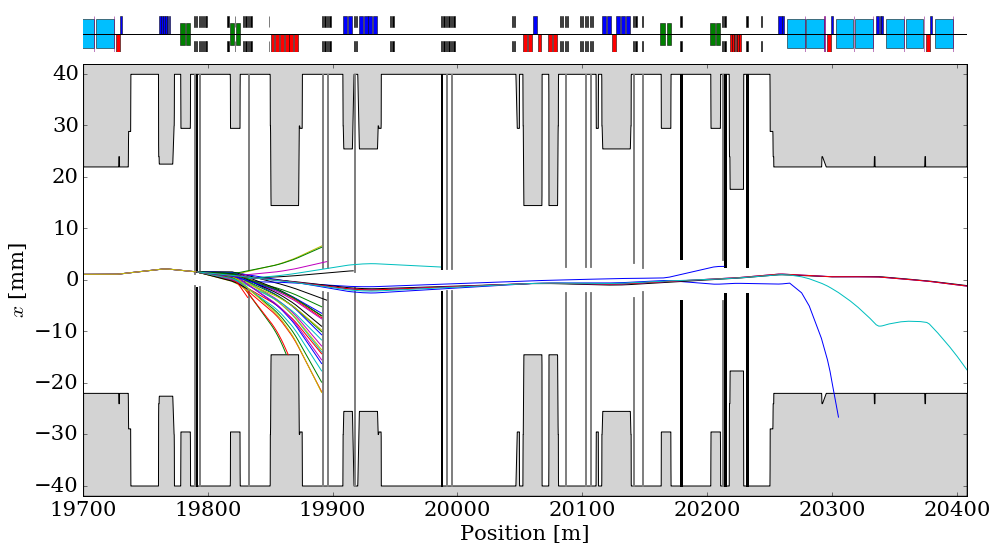

In [247]:
pth = '/home/phermes/Dropbox/codes/madx/160218_beamlinegraphics/twiss_b1.data.thick'

b = blg.beamlinegraphics(pth)

xmin, xmax    = 19700,20408          # interval in which the blgFigure should be plotted
ymin, ymax    = -42,42
b.aspectratio = 0.9                  # aspect ratio
b.fontscale   = 0.8                  # rescale the font size if necessary; default=1
b.textwidth   = 1.0                  # adjust the textwidth; default=1

b.hspace=0.05

b.blgFigure(xmin,xmax)               # create blgFigure object



for ii in np.unique(np.array(df.pid)):
     b.ax1.plot(df[df.pid==ii].S,df[df.pid==ii].x)


# draw only horizontal collimators
plot_colli_gaps(b.ax1,collimators[collimators.angle==0])
plot_colli_gaps(b.ax1,collimators)

app = ap[(ap['s[m]']>xmin) & (ap['s[m]']<xmax)]

b.ax1.fill_between(app['s[m]'],app['aper1[mm]'],42.*np.ones(len(app['s[m]'])),facecolor='lightgray')
b.ax1.fill_between(app['s[m]'],-app['aper1[mm]'],-42.*np.ones(len(app['s[m]'])),facecolor='lightgray')

b.ax1.set_ylim(ymin,ymax)


b.ax1.set_ylabel(r'$x$ [mm]')

plt.savefig('fragmentation.pgf',bbox_inches='tight')
plt.show()